# **OLYMPICS ANALYSIS**

**Importing Libraries**

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

**Loading DataSet**

In [79]:
summer = pd.read_csv('/content/Athletes_summer_games.csv')
winter = pd.read_csv('/content/Athletes_winter_games.csv')

# We had concatenated 2 DataSets

df= pd.concat([summer, winter])
df.head()

,Unnamed: 0,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,1,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,2,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


# **Cleaning Data**

**Checking Dtype**

In [80]:
df.dtypes

Unnamed: 0      int64
Name           object
Sex            object
Age           float64
Team           object
NOC            object
Games          object
Year            int64
Season         object
City           object
Sport          object
Event          object
Medal          object
dtype: object

**Checking Null Values**

In [81]:
df.isnull().sum()

Unnamed: 0         0
Name               0
Sex                0
Age             9474
Team               0
NOC                0
Games              0
Year               0
Season             0
City               0
Sport              0
Event              0
Medal         244005
dtype: int64

There are 9474 null values in Age column. For time being i will replace null values with average age.

In [82]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [83]:
df.isnull().sum()

Unnamed: 0         0
Name               0
Sex                0
Age                0
Team               0
NOC                0
Games              0
Year               0
Season             0
City               0
Sport              0
Event              0
Medal         244005
dtype: int64

Hence now there are no NULL values

# **Q1) What are the top 5 sports where USA got most gold medals ?**

In [84]:
usa_gold = df[(df['Team'] == 'United States') & (df['Medal'] == 'Gold')]

In [85]:
usa_gold.head()

,Unnamed: 0,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
214,283,Margaret Ives Abbott (-Dunne),F,23.0,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold
540,609,Julius Shareef Abdur-Rahim,M,23.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
648,739,Michael Brent Abernathy,M,22.0,United States,USA,2000 Summer,2000,Summer,Sydney,Baseball,Baseball Men's Baseball,Gold
691,787,"Edgar Allen ""Ed"" Ablowich",M,19.0,United States,USA,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Men's 4 x 400 metres Relay,Gold
1061,1239,"Charles Edwin ""Charley"" Ackerly",M,22.0,United States,USA,1920 Summer,1920,Summer,Antwerpen,Wrestling,"Wrestling Men's Featherweight, Freestyle",Gold


In [86]:
top_5 = pd.DataFrame(usa_gold['Sport'].value_counts().head())

In [87]:
top_5

,Sport
Swimming,667
Athletics,558
Basketball,305
Rowing,160
Shooting,120


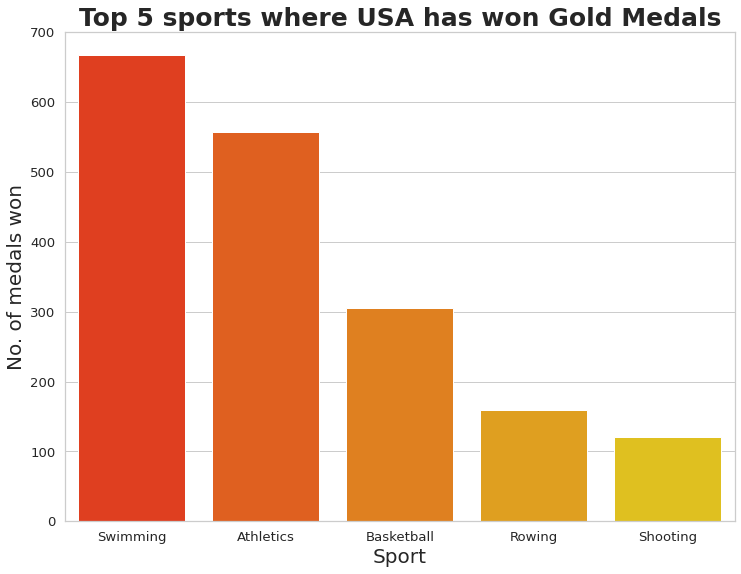

In [89]:
plt.figure(figsize=(12,9))
sns.set(font_scale = 1.2)
sns.set_style('whitegrid')
sns.barplot(x = top_5.index, y = top_5['Sport'], dodge = False, palette = 'autumn')
plt.title('Top 5 sports where USA has won Gold Medals', weight='bold').set_fontsize('25')
plt.ylabel('No. of medals won', fontsize=20)
plt.xlabel('Sport', fontsize=20)
plt.show()

# **Q2) How many Gold Medals does Michael Phelps won and in Which Year ?**

In [105]:
phelps = df[df['Name'].str.contains('Michael Fred Phelps, II') & (df['Medal'] == 'Gold')]

In [138]:
medals = pd.DataFrame(phelps['Year'].value_counts())

In [139]:
medals

,Year
2008,8
2004,6
2016,5
2012,4


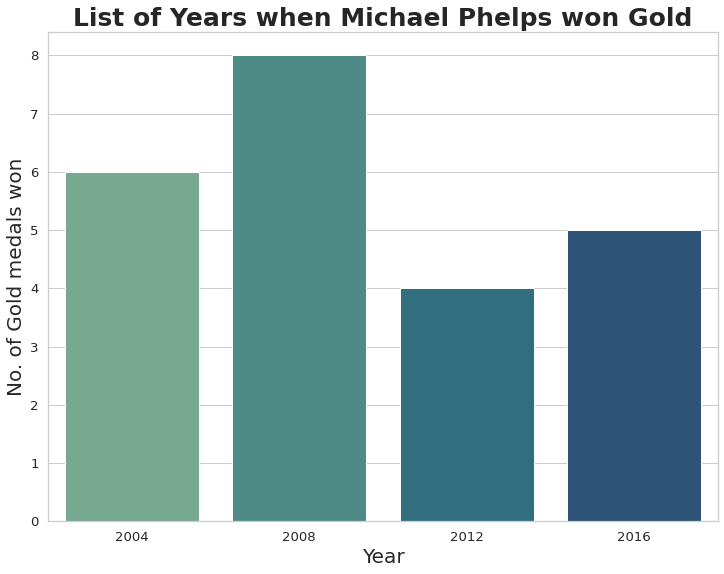

In [149]:
plt.figure(figsize=(12,9))
sns.set(font_scale = 1.2)
sns.set_style('whitegrid')
sns.barplot(x = medals.index, y = medals['Year'], dodge = False, palette = 'crest')
plt.title('List of Years when Michael Phelps won Gold', weight='bold').set_fontsize('25')
plt.ylabel('No. of Gold medals won', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

# **Q3) Who are the top 5 players to win most Medals in olympic history ?**

In [152]:
winners = df.dropna()

In [153]:
winners.head()

,Unnamed: 0,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
12,37,Arvo Ossian Aaltonen,M,30.0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
13,38,Arvo Ossian Aaltonen,M,30.0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
15,41,Paavo Johannes Aaltonen,M,28.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
16,42,Paavo Johannes Aaltonen,M,28.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold


In [170]:
top_5 = pd.DataFrame(winners['Name'].value_counts().head())

In [163]:
top_5

,Name
"Michael Fred Phelps, II",28
Larysa Semenivna Latynina (Diriy-),18
Nikolay Yefimovich Andrianov,15
Edoardo Mangiarotti,13
Takashi Ono,13


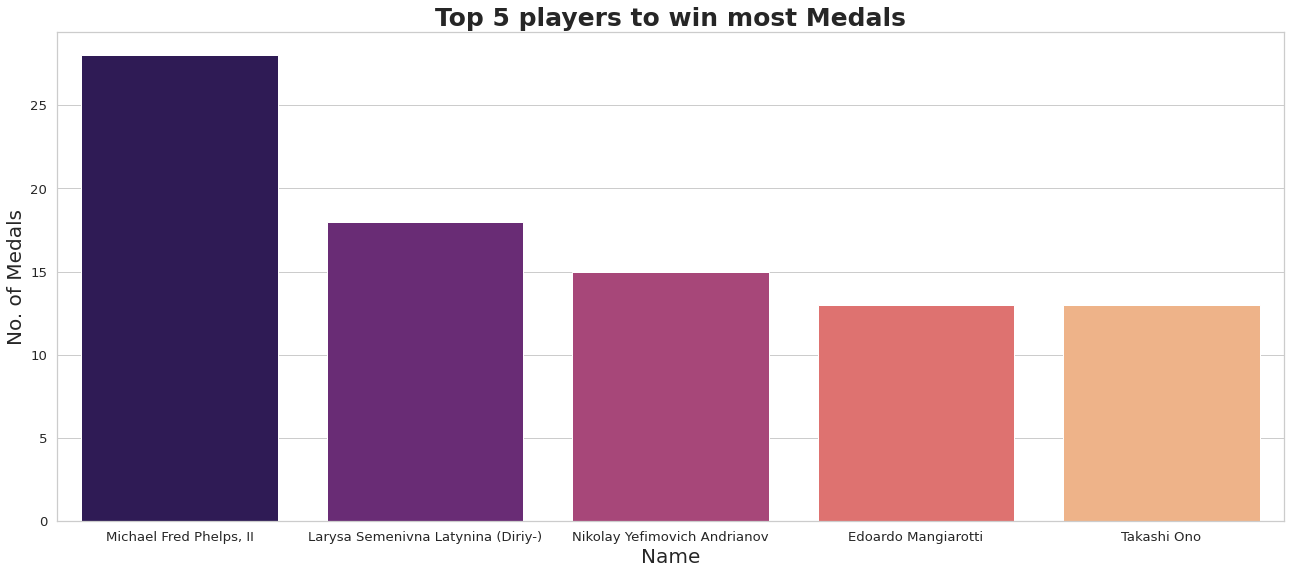

In [171]:
plt.figure(figsize=(22,9))
sns.set(font_scale = 1.2)
sns.set_style('whitegrid')
sns.barplot(x = top_5.index, y = top_5['Name'], dodge = False, palette = 'magma')
plt.title('Top 5 players to win most Medals', weight='bold').set_fontsize('25')
plt.ylabel('No. of Medals', fontsize=20)
plt.xlabel('Name', fontsize=20)
plt.show()

# **Q4) How many Medals did Indians won post 2000 ?**

In [175]:
india_2000 = winners[(winners['Team'] == 'India') & (winners['Year'] > 2000)]

In [196]:
ind_medals = india_2000['Medal'].value_counts()

In [197]:
ind_medals

Bronze    28
Silver     6
Gold       2
Name: Medal, dtype: int64

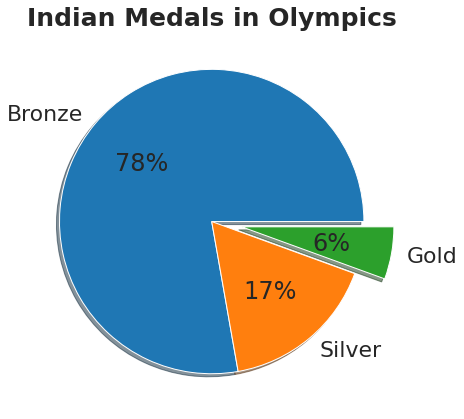

In [209]:
plt.figure(figsize=(13,7))
sns.set(font_scale = 2.0)
palette_color = sns.color_palette('tab10')
label = ['Bronze', 'Silver', 'Gold']
explode = [0, 0, 0.2]
plt.pie(ind_medals, labels = label, colors= palette_color, shadow = True, explode = explode, autopct='%.0f%%')
plt.title('Indian Medals in Olympics', weight='bold').set_fontsize('25')
plt.show()

# **Q5) List of all Indian Gold Medalists post 2000**

In [219]:
india_2000[india_2000['Medal'] == 'Gold']

,Unnamed: 0,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
18444,22004,Abhinav Bindra,M,25.0,India,IND,2008 Summer,2008,Summer,Beijing,Shooting,"Shooting Men's Air Rifle, 10 metres",Gold
224971,2419,CHOPRA Neeraj,M,23.0,India,IND,2020 Summer,2020,Summer,Tokyo,Athletics,Men's Javelin Throw,Gold


# **Q6) What are top 10 teams to win most medals in shooting ?**

In [231]:
shooting = winners[winners['Sport'] == 'Shooting']

In [237]:
top_10_shootings = pd.DataFrame(shooting['Team'].value_counts().head(10))

In [238]:
top_10_shootings

,Team
United States,201
Sweden,126
Great Britain,88
Norway,77
France,70
China,69
Switzerland,55
Soviet Union,49
Russia,46
Italy,44


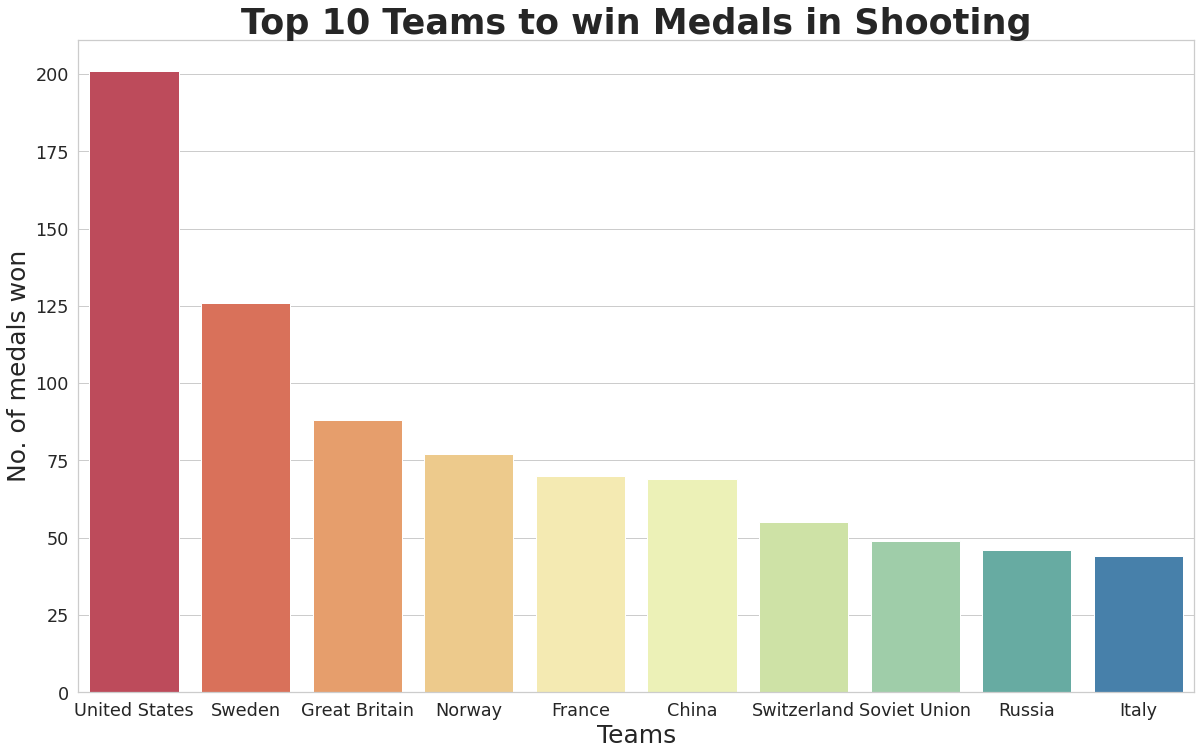

In [246]:
plt.figure(figsize=(20,12))
sns.set(font_scale = 1.6)
sns.set_style('whitegrid')
sns.barplot(x = top_10_shootings.index, y = top_10_shootings['Team'], dodge = False, palette = 'Spectral')
plt.title('Top 10 Teams to win Medals in Shooting', weight='bold').set_fontsize('35')
plt.ylabel('No. of medals won', fontsize=25)
plt.xlabel('Teams', fontsize=25)
plt.show()

# **Q7) What are top 10 teams to win most medals in badminton ?**

In [249]:
bad = pd.DataFrame(bad['Team'].value_counts().head(10))

In [250]:
bad

,Team
China,34
China-1,22
South Korea-1,20
China-2,18
Indonesia,17
Indonesia-1,14
Malaysia,10
South Korea-2,10
Denmark,9
South Korea,7


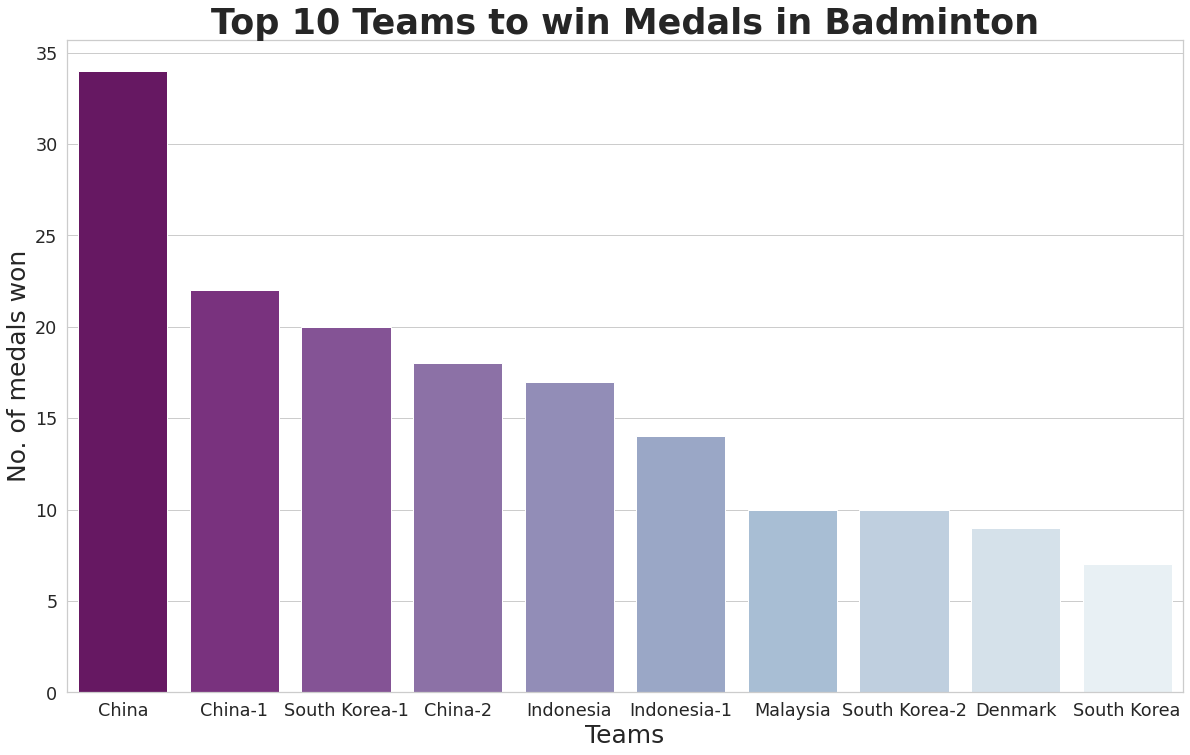

In [259]:
plt.figure(figsize=(20,12))
sns.set(font_scale = 1.6)
sns.set_style('whitegrid')
sns.barplot(x = bad.index, y = bad['Team'], dodge = False, palette = 'BuPu_r')
plt.title('Top 10 Teams to win Medals in Badminton', weight='bold').set_fontsize('35')
plt.ylabel('No. of medals won', fontsize=25)
plt.xlabel('Teams', fontsize=25)
plt.show()

In [260]:
winners

,Unnamed: 0,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
12,37,Arvo Ossian Aaltonen,M,30.0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
13,38,Arvo Ossian Aaltonen,M,30.0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
15,41,Paavo Johannes Aaltonen,M,28.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
16,42,Paavo Johannes Aaltonen,M,28.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48405,270641,Sergey Mikhaylovich Zubov,M,21.0,Unified Team,EUN,1992 Winter,1992,Winter,Albertville,Ice Hockey,Ice Hockey Men's Ice Hockey,Gold
48449,270827,Matja Zupan,M,19.0,Yugoslavia,YUG,1988 Winter,1988,Winter,Calgary,Ski Jumping,"Ski Jumping Men's Large Hill, Team",Silver
48481,270876,Pirmin Zurbriggen,M,25.0,Switzerland,SUI,1988 Winter,1988,Winter,Calgary,Alpine Skiing,Alpine Skiing Men's Downhill,Gold
48483,270878,Pirmin Zurbriggen,M,25.0,Switzerland,SUI,1988 Winter,1988,Winter,Calgary,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze


# **Q8) Top 10 Teams to win Medals in Gymnastics**

In [261]:
gym = winners[winners['Sport'] == 'Gymnastics']

In [262]:
gym = pd.DataFrame(gym['Team'].value_counts().head(10))

In [263]:
gym

,Team
Soviet Union,288
United States,177
Japan,166
Romania,135
Norway,121
Hungary,111
Denmark,111
China,109
Sweden,103
Italy,100


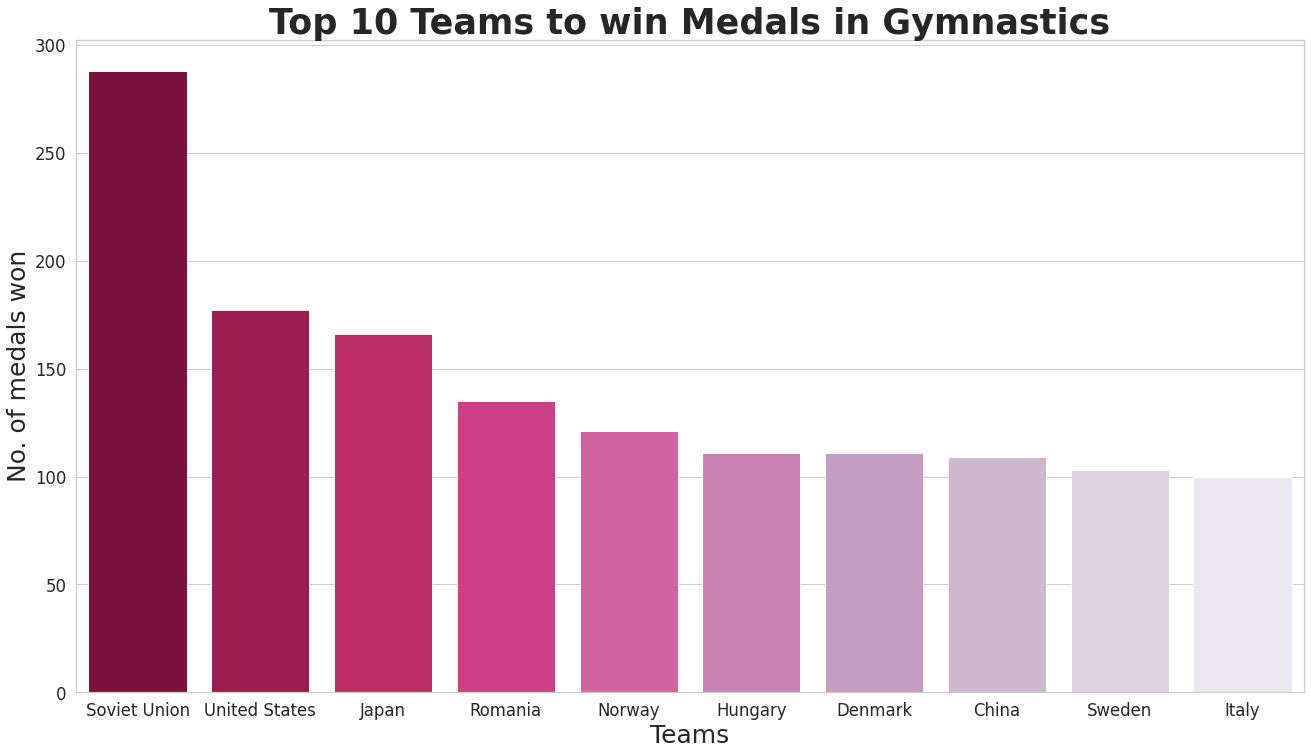

In [271]:
plt.figure(figsize=(22,12))
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.barplot(x = gym.index, y = gym['Team'], dodge = False, palette = 'PuRd_r')
plt.title('Top 10 Teams to win Medals in Gymnastics', weight='bold').set_fontsize('35')
plt.ylabel('No. of medals won', fontsize=25)
plt.xlabel('Teams', fontsize=25)
plt.show()

# **Done By Syed Miran Hussain**